##**Setting up**

In [1]:
from google.colab import drive
drive.mount('drive')



Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
from scipy.stats import pointbiserialr
from sklearn import preprocessing
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from scipy import stats


**Reading in datasets**

In [9]:
topic_modelling = pd.read_csv('/content/drive/MyDrive/Code Submission/Datasets/topic_modeling.csv')
topic_modelling = topic_modelling[['username', 'id', 'date', 'retweets', 'likes', 'Software', 'Cloud', 'Work', 'Humor', 'Woman', 'Partnership', 'Community', 'Improvement']]
topic_modelling

stocks = pd.read_csv('/content/drive/MyDrive/Code Submission/Datasets/stock_prices.csv')
financial_market = pd.read_csv('/content/drive/MyDrive/Code Submission/Datasets/financial_market.csv')
financial_income = pd.read_csv('/content/drive/MyDrive/Code Submission/Datasets/financial_income.csv')

sentiment_analysis = pd.read_csv("/content/drive/MyDrive/Data Modelling/Sentiment Analysis/labelled_ceo_tweets_svm_vader.csv")

# sundarpichai   Google GOOG
# satyanadella    Microsoft MSFT
# tim_cook        Apple AAPL
# elonmusk       Tesla TSLA
# ajassy          Amazon AMZN
stocks.columns





Index(['Unnamed: 0', 'date', 'open', 'high', 'low', 'close', 'adjClose',
       'volume', 'unadjustedVolume', 'change', 'changePercent', 'vwap',
       'label', 'changeOverTime', 'Stock Name'],
      dtype='object')

**Getting financial data**
- EPS
- PE ratio
- Market Cap

In [10]:
# Obtaining marketcap, peRatio and eps
financial_market = financial_market[['symbol', 'date', 'marketCap', 'peRatio']]


financial_market['year'] = financial_market['date'].str[:4]
financial_market = financial_market[financial_market['year'] == '2021']
financial_market = financial_market[['symbol', 'marketCap', 'peRatio']]

financial_income = financial_income[['symbol', 'date', 'eps']]
financial_income['year'] = financial_income['date'].str[:4]
financial_income = financial_income[financial_income['year']=='2021']
financial_income = financial_income[['symbol', 'eps']]

financial_metrics = financial_market.merge(financial_income,how='inner', on='symbol')
financial_metrics['username'] = ['@elonmusk', '@ajassy', '@tim_cook', '@sundarpichai','@satyanadella']
financial_metrics

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,symbol,marketCap,peRatio,eps,username
0,TSLA,812495976960,147.217970,5.750000,@elonmusk
1,AMZN,1439780000000,43.153699,65.960000,@ajassy
2,AAPL,2482477053379,26.219656,5.670000,@tim_cook
3,GOOG,1774771018820,23.342115,114.205162,@sundarpichai
4,MSFT,2150215800188,35.093532,8.120000,@satyanadella


##**Stocks, Financial, Topic modelling datasets EDA**

###**Stocks**

Text(0.5, 1.0, 'TSLA closing price')

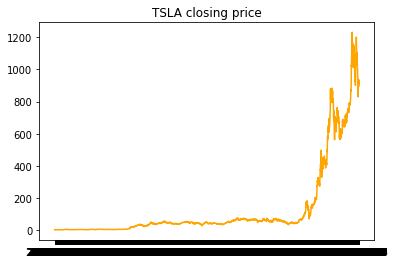

In [11]:
import matplotlib.pyplot as plt

tsla = stocks[stocks['Stock Name']=='TSLA'].sort_values(by='date', ascending=True)
amazon = stocks[stocks['Stock Name']=='AMZN'].sort_values(by='date', ascending=True)
apple = stocks[stocks['Stock Name']=='AAPL'].sort_values(by='date', ascending=True)
google = stocks[stocks['Stock Name']=='GOOG'].sort_values(by='date', ascending=True)
microsoft = stocks[stocks['Stock Name']=='MSFT'].sort_values(by='date', ascending=True)

plt.plot(tsla['date'],tsla['close'],label='Tesla', color='orange')
plt.title('TSLA closing price')

Text(0.5, 1.0, 'AMZN closing price')

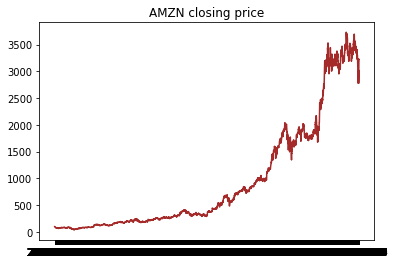

In [12]:
plt.plot(amazon['date'],amazon['close'],label='Amazon', color='brown')
plt.title('AMZN closing price')

Text(0.5, 1.0, 'Apple closing price')

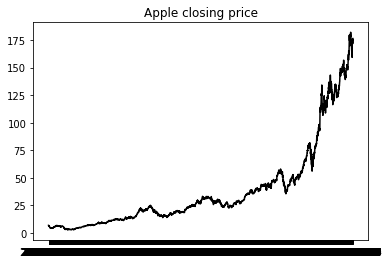

In [13]:
plt.plot(apple['date'],apple['close'],label='Apple', color='black')
plt.title('Apple closing price')

Text(0.5, 1.0, 'Google closing price')

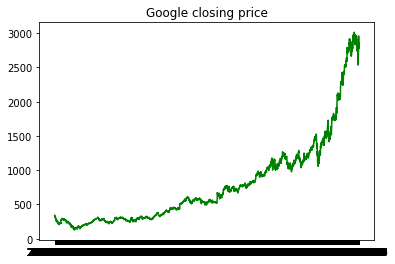

In [14]:
plt.plot(google['date'],google['close'],label='Google', color='green')
plt.title('Google closing price')

Text(0.5, 1.0, 'Microsoft closing price')

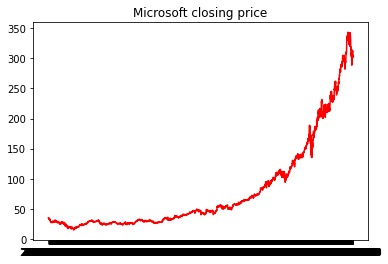

In [15]:
plt.plot(microsoft['date'],microsoft['close'],label='Microsoft', color='Red')
plt.title('Microsoft closing price')

###**Financial Metrics**

Text(0.5, 1.0, 'Market cap')

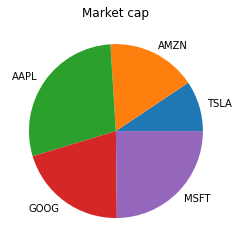

In [16]:
plt.pie(financial_metrics['marketCap'],labels=financial_metrics['symbol'] )
plt.title('Market cap')

Text(0.5, 1.0, 'PE Ratio')

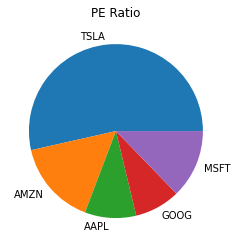

In [17]:
plt.pie(financial_metrics['peRatio'],labels=financial_metrics['symbol'] )
plt.title('PE Ratio')

Text(0.5, 1.0, 'EPS')

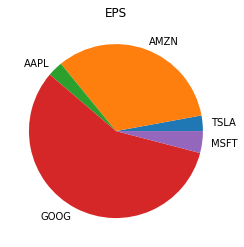

In [18]:
plt.pie(financial_metrics['eps'],labels=financial_metrics['symbol'] )
plt.title('EPS')

###**Topic Modeling**

Text(0.5, 1.0, '@ajassy | Amazon')

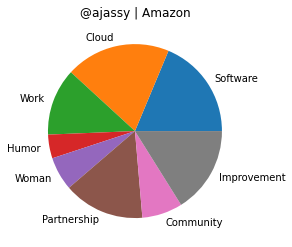

In [19]:
topic_modelling
tm_table = topic_modelling.groupby('username').aggregate({'Software': 'sum',
                                                          'Cloud': 'sum',
                                                          'Work': 'sum',
                                                          'Humor': 'sum',
                                                          'Woman': 'sum',
                                                          'Partnership':'sum',
                                                          'Community': 'sum',
                                                          'Improvement': 'sum'}).reset_index()


plt.pie(tm_table.iloc[0,1:].values, labels = tm_table.columns[1:])
plt.title('@ajassy | Amazon')

Text(0.5, 1.0, '@elonmusk | Tesla')

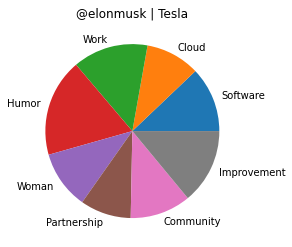

In [20]:
plt.pie(tm_table.iloc[1,1:].values, labels = tm_table.columns[1:])
plt.title('@elonmusk | Tesla')

Text(0.5, 1.0, '@satyanadella | Microsoft')

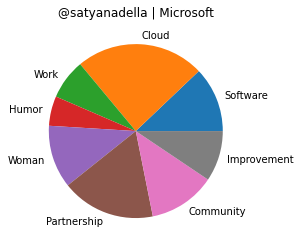

In [21]:
plt.pie(tm_table.iloc[2,1:].values, labels = tm_table.columns[1:])
plt.title('@satyanadella | Microsoft')

Text(0.5, 1.0, '@sundarpichai | Google')

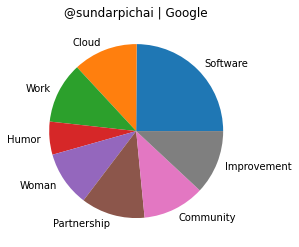

In [22]:
plt.pie(tm_table.iloc[3,1:].values, labels = tm_table.columns[1:])
plt.title('@sundarpichai | Google')

Text(0.5, 1.0, '@tim_cook | Apple')

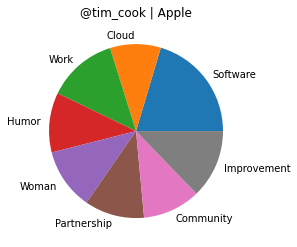

In [23]:
plt.pie(tm_table.iloc[4,1:].values, labels = tm_table.columns[1:])
plt.title('@tim_cook | Apple')

##**Data cleaning**

**Data cleaning for topic modelling**

In [24]:
from datetime import datetime
# sundarpichai   Google GOOG
# satyanadella    Microsoft MSFT
# tim_cook        Apple AAPL
# elonmusk       Tesla TSLA
# ajassy          Amazon AMZN

# Getting corresponding ticker for each CEO twitter handle
username_dict = {'@elonmusk': 'TSLA',
                 '@sundarpichai': 'GOOG',
                 '@satyanadella': 'MSFT',
                 '@tim_cook': 'AAPL',
                 '@ajassy': 'AMZN'}

# Converting to date  
topic_modelling['symbol'] = topic_modelling['username'].map(username_dict)
topic_modelling['datetime'] = topic_modelling['date'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))
topic_modelling['date'] = topic_modelling['date'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S')).dt.date
topic_modelling

,username,id,date,retweets,likes,Software,Cloud,Work,Humor,Woman,Partnership,Community,Improvement,symbol,datetime
0,@elonmusk,1490909887676973056,2022-02-08,188,4193,0,0,0,0,0,1,0,0,TSLA,2022-02-08 04:46:31
1,@elonmusk,1490832993258450944,2022-02-07,11029,96629,0,0,0,1,0,0,0,0,TSLA,2022-02-07 23:40:58
2,@elonmusk,1490831891640946689,2022-02-07,828,9829,0,0,0,0,0,0,0,1,TSLA,2022-02-07 23:36:35
3,@elonmusk,1490831581606416384,2022-02-07,420,4962,0,0,0,1,0,0,0,0,TSLA,2022-02-07 23:35:22
4,@elonmusk,1490830963290427392,2022-02-07,162,4592,0,0,0,1,0,0,0,0,TSLA,2022-02-07 23:32:54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5683,@sundarpichai,1517273958,2009-04-14,0,2,1,0,0,0,0,0,0,0,GOOG,2009-04-14 15:15:40
5684,@sundarpichai,1435641821,2009-04-02,0,2,1,0,0,0,0,0,0,0,GOOG,2009-04-02 01:50:55
5685,@sundarpichai,1205396897,2009-02-13,0,4,0,0,1,0,0,0,0,0,GOOG,2009-02-13 05:08:29
5686,@sundarpichai,774770442,2008-03-21,1,5,0,0,0,0,0,0,0,1,GOOG,2008-03-21 03:26:16


**Data cleaning for stocks**

In [ ]:
stocks = stocks.iloc[:,1:]

# converting to datetime
stocks['date'] = stocks['label'].apply(lambda x: datetime.strptime(str(x), '%B %d, %y')).dt.date
# stock symbol
stocks['symbol'] = stocks['Stock Name']

# lead the stock price by 1 day
#stocks['vol_lead'] = stocks.sort_values(by='date', ascending=True).groupby(['symbol'])['volume'].shift(-1)
stocks['change_lead'] = stocks.sort_values(by='date', ascending=True).groupby(['symbol'])['change'].shift(-1)

# change from previous day
stocks['change_1'] = stocks.sort_values(by='date', ascending=True).groupby(['symbol'])['change'].shift(1)
# change from prev prev day
stocks['change_2'] = stocks.sort_values(by='date', ascending=True).groupby(['symbol'])['change_1'].shift(1)

# volume from previous day
stocks['volume_1'] = stocks.sort_values(by='date', ascending=True).groupby(['symbol'])['volume'].shift(1)
# change in volume from prev day
stocks['volume_diff'] = stocks['volume'] - stocks['volume_1']
# next day's volume change
stocks['vol_diff_lead'] = stocks.sort_values(by='date', ascending=True).groupby(['symbol'])['volume_diff'].shift(-1)

stocks=stocks[['date','symbol', 'vol_diff_lead', 'change_lead']]

# convert to binary
stocks['change_lead'] = stocks['change_lead'].apply(lambda x: 0 if x<0 else 1)
stocks['vol_diff_lead'] = stocks['vol_diff_lead'].apply(lambda x: 0 if x<0 else 1)
stocks

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,symbol,vol_diff_lead,change_lead
0,2022-02-09,TSLA,1,1
1,2022-02-08,TSLA,1,0
2,2022-02-07,TSLA,0,1
3,2022-02-04,TSLA,0,0
4,2022-02-03,TSLA,0,1
...,...,...,...,...
17133,2008-01-08,GOOG,1,1
17134,2008-01-07,GOOG,0,0
17135,2008-01-04,GOOG,1,0
17136,2008-01-03,GOOG,1,0


##**Merging**

**Merge features with tweets**
- Merge financial metrics to tweets with topic modelling (merge_1)
- Merge stocks to tweets to get leading change in volume and price (merge_2)
- Merge with dataset with sentiment scores (final_df)

In [ ]:
# original
#merge_1 = topic_modelling.merge(financial_metrics, how='left', on=['symbol', 'username'])
#merge_2 = merge_1.merge(stocks, how='left', on=['symbol', 'date'])
#final_df = merge_2.merge(sentiment_analysis[["id", "predicted sentiment by SVC"]], how='left', on=['id'])
#final_df['change_lead'].isna().sum() / len(final_df)

In [ ]:
topic_modelling.dtypes

username               object
id                      int64
date                   object
retweets                int64
likes                   int64
Software                int64
Cloud                   int64
Work                    int64
Humor                   int64
Woman                   int64
Partnership             int64
Community               int64
Improvement             int64
symbol                 object
datetime       datetime64[ns]
dtype: object

In [ ]:
# change
import datetime

merge_1 = topic_modelling.merge(sentiment_analysis[["id", "predicted sentiment by SVC"]], how='left', on=['id'])
merge_2 = merge_1.merge(financial_metrics, how='left', on=['symbol', 'username'])

merge_2['date'] = merge_2['datetime'].apply(lambda x: x.date()  if x.hour < 21 else x.date() + datetime.timedelta(days=1))
merge_2

final_df = merge_2.merge(stocks, how='left', on=['symbol', 'date'])
final_df = final_df.drop("datetime", axis = 1)
final_df['change_lead'].isna().sum() / len(final_df)

0.1918073136427567

In [ ]:
# Create flags for company
#company = list(final_df['symbol'].unique())
#for i in company:
  #final_df[i] = final_df['symbol'].apply(lambda x:1 if x==str(i) else 0)

In [ ]:
final_df = final_df.dropna()
final_df.shape

(4597, 20)

In [ ]:
final_df = final_df.rename(columns={'predicted sentiment by SVC': 'sentiment'})

In [ ]:
final_df.dtypes

username          object
id                 int64
date              object
retweets           int64
likes              int64
Software           int64
Cloud              int64
Work               int64
Humor              int64
Woman              int64
Partnership        int64
Community          int64
Improvement        int64
symbol            object
sentiment          int64
marketCap          int64
peRatio          float64
eps              float64
vol_diff_lead    float64
change_lead      float64
dtype: object

In [ ]:
# convert the  target variable to categorical/binary data
final_df["vol_diff_lead"] = final_df["vol_diff_lead"].astype(int)
final_df["change_lead"] = final_df["change_lead"].astype(int)
final_df

,username,id,date,retweets,likes,Software,Cloud,Work,Humor,Woman,Partnership,Community,Improvement,symbol,sentiment,marketCap,peRatio,eps,vol_diff_lead,change_lead
0,@elonmusk,1490909887676973056,2022-02-08,188,4193,0,0,0,0,0,1,0,0,TSLA,0,812495976960,147.217970,5.750000,1,0
1,@elonmusk,1490832993258450944,2022-02-08,11029,96629,0,0,0,1,0,0,0,0,TSLA,0,812495976960,147.217970,5.750000,1,0
2,@elonmusk,1490831891640946689,2022-02-08,828,9829,0,0,0,0,0,0,0,1,TSLA,-1,812495976960,147.217970,5.750000,1,0
3,@elonmusk,1490831581606416384,2022-02-08,420,4962,0,0,0,1,0,0,0,0,TSLA,1,812495976960,147.217970,5.750000,1,0
4,@elonmusk,1490830963290427392,2022-02-08,162,4592,0,0,0,1,0,0,0,0,TSLA,0,812495976960,147.217970,5.750000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5682,@sundarpichai,1653976734,2009-04-30,0,4,1,0,0,0,0,0,0,0,GOOG,0,1774771018820,23.342115,114.205162,0,0
5683,@sundarpichai,1517273958,2009-04-14,0,2,1,0,0,0,0,0,0,0,GOOG,1,1774771018820,23.342115,114.205162,1,1
5684,@sundarpichai,1435641821,2009-04-02,0,2,1,0,0,0,0,0,0,0,GOOG,1,1774771018820,23.342115,114.205162,0,1
5685,@sundarpichai,1205396897,2009-02-13,0,4,0,0,1,0,0,0,0,0,GOOG,0,1774771018820,23.342115,114.205162,1,0


# Aggregation

In [ ]:
# AGGGREGATE BY DATE & ACCOUNTING FOR UTC TIME -> NEW YORK STOCK EXCHANGE TIME

#import datetime

#final_df['date'] = final_df['datetime'].apply(lambda x: x.date()  if x.hour < 21 else x.date() + datetime.timedelta(days=1))
#final_df = final_df.drop(columns=['datetime'])
#final_df

In [ ]:
final_df.columns

Index(['username', 'id', 'date', 'retweets', 'likes', 'Software', 'Cloud',
       'Work', 'Humor', 'Woman', 'Partnership', 'Community', 'Improvement',
       'symbol', 'sentiment', 'marketCap', 'peRatio', 'eps', 'vol_diff_lead',
       'change_lead'],
      dtype='object')

In [ ]:
# aggregation
final_df_agg = final_df.groupby(["date","symbol","marketCap","eps","vol_diff_lead", "change_lead", "peRatio"]).agg({"retweets": "sum", 
                                                                                     "likes": "sum", 
                                                                                     "Software": "sum", 
                                                                                     "Cloud": "sum", 
                                                                                     "Work": "sum", 
                                                                                     "Humor": "sum", 
                                                                                     "Woman": "sum", 
                                                                                     "Partnership": "sum", 
                                                                                     "Community": "sum", 
                                                                                     "Improvement": "sum", 
                                                                                     "sentiment": "mean", }).reset_index()

In [ ]:
final_df_agg

,date,symbol,marketCap,eps,vol_diff_lead,change_lead,peRatio,retweets,likes,Software,Cloud,Work,Humor,Woman,Partnership,Community,Improvement,sentiment
0,2008-03-12,GOOG,1774771018820,114.205162,1,1,23.342115,2,8,1,0,0,0,0,0,0,0,0.000000
1,2009-02-11,MSFT,2150215800188,8.120000,1,1,35.093532,129,105,0,0,0,0,0,1,0,0,0.000000
2,2009-02-13,GOOG,1774771018820,114.205162,1,0,23.342115,0,4,0,0,1,0,0,0,0,0,0.000000
3,2009-04-02,GOOG,1774771018820,114.205162,0,1,23.342115,0,2,1,0,0,0,0,0,0,0,1.000000
4,2009-04-02,MSFT,2150215800188,8.120000,0,0,35.093532,9,14,0,0,0,0,1,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2757,2022-02-04,TSLA,812495976960,5.750000,0,0,147.217970,7867,126531,3,1,1,3,3,2,4,1,0.000000
2758,2022-02-07,AMZN,1439780000000,65.960000,0,1,43.153699,104,682,0,0,0,0,0,1,0,0,1.000000
2759,2022-02-07,GOOG,1774771018820,114.205162,0,1,23.342115,89,1004,0,1,0,0,0,0,0,0,0.000000
2760,2022-02-07,TSLA,812495976960,5.750000,0,1,147.217970,42034,383878,1,1,5,3,1,2,2,3,0.090909


In [ ]:
# including prev day change var

df_w_prev = pd.DataFrame()
companies = ['TSLA', 'AMZN', 'AAPL', 'MSFT', 'GOOG']
for company in companies:
  tempdf = final_df_agg[final_df_agg['symbol'] == company]
  tempdf = tempdf.sort_values(by=['date'])
  tempdf['prev_day_change'] = tempdf['change_lead'].shift(1)
  tempdf = tempdf.dropna()
  df_w_prev = df_w_prev.append(tempdf)

In [ ]:
final_df_agg = df_w_prev.copy()

In [ ]:
final_df_agg['prev_day_change'] = final_df_agg['prev_day_change'].astype(int)

In [ ]:
final_df_agg

,date,symbol,marketCap,eps,vol_diff_lead,change_lead,peRatio,retweets,likes,Software,Cloud,Work,Humor,Woman,Partnership,Community,Improvement,sentiment,prev_day_change
2600,2021-10-27,TSLA,812495976960,5.750000,0,1,147.217970,14008,87566,0,2,0,0,0,1,0,2,0.200000,0
2602,2021-10-28,TSLA,812495976960,5.750000,1,1,147.217970,32204,204336,2,3,4,4,3,2,4,3,0.166667,1
2605,2021-10-29,TSLA,812495976960,5.750000,1,1,147.217970,76060,1158958,3,4,4,7,4,5,4,5,0.066667,1
2607,2021-11-01,TSLA,812495976960,5.750000,0,1,147.217970,44169,422058,6,7,5,10,5,7,4,6,0.227273,1
2609,2021-11-02,TSLA,812495976960,5.750000,0,1,147.217970,33735,303856,3,2,3,2,2,3,3,2,0.166667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2747,2022-02-01,GOOG,1774771018820,114.205162,1,0,23.342115,318,4200,1,0,0,0,0,0,0,0,1.000000,0
2751,2022-02-02,GOOG,1774771018820,114.205162,0,0,23.342115,104,1441,0,0,1,0,0,0,0,0,0.000000,0
2754,2022-02-03,GOOG,1774771018820,114.205162,0,0,23.342115,495,14242,0,0,0,1,0,0,0,0,1.000000,0
2756,2022-02-04,GOOG,1774771018820,114.205162,0,0,23.342115,232,2092,0,0,0,0,0,1,0,0,0.000000,0


In [ ]:
final_df_agg.isna().sum()

date               0
symbol             0
marketCap          0
eps                0
vol_diff_lead      0
change_lead        0
peRatio            0
retweets           0
likes              0
Software           0
Cloud              0
Work               0
Humor              0
Woman              0
Partnership        0
Community          0
Improvement        0
sentiment          0
prev_day_change    0
dtype: int64

# **Some basic Exploratory Data Analysis to glean insights**



## Heatmap on continuous variable

In [ ]:
final_df_agg

,date,symbol,marketCap,eps,vol_diff_lead,change_lead,peRatio,retweets,likes,Software,Cloud,Work,Humor,Woman,Partnership,Community,Improvement,sentiment,prev_day_change
2600,2021-10-27,TSLA,812495976960,5.750000,0,1,147.217970,14008,87566,0,2,0,0,0,1,0,2,0.200000,0
2602,2021-10-28,TSLA,812495976960,5.750000,1,1,147.217970,32204,204336,2,3,4,4,3,2,4,3,0.166667,1
2605,2021-10-29,TSLA,812495976960,5.750000,1,1,147.217970,76060,1158958,3,4,4,7,4,5,4,5,0.066667,1
2607,2021-11-01,TSLA,812495976960,5.750000,0,1,147.217970,44169,422058,6,7,5,10,5,7,4,6,0.227273,1
2609,2021-11-02,TSLA,812495976960,5.750000,0,1,147.217970,33735,303856,3,2,3,2,2,3,3,2,0.166667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2747,2022-02-01,GOOG,1774771018820,114.205162,1,0,23.342115,318,4200,1,0,0,0,0,0,0,0,1.000000,0
2751,2022-02-02,GOOG,1774771018820,114.205162,0,0,23.342115,104,1441,0,0,1,0,0,0,0,0,0.000000,0
2754,2022-02-03,GOOG,1774771018820,114.205162,0,0,23.342115,495,14242,0,0,0,1,0,0,0,0,1.000000,0
2756,2022-02-04,GOOG,1774771018820,114.205162,0,0,23.342115,232,2092,0,0,0,0,0,1,0,0,0.000000,0


In [ ]:
final_df_agg.columns

Index(['date', 'symbol', 'marketCap', 'eps', 'vol_diff_lead', 'change_lead',
       'peRatio', 'retweets', 'likes', 'Software', 'Cloud', 'Work', 'Humor',
       'Woman', 'Partnership', 'Community', 'Improvement', 'sentiment',
       'prev_day_change'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Heatmap')

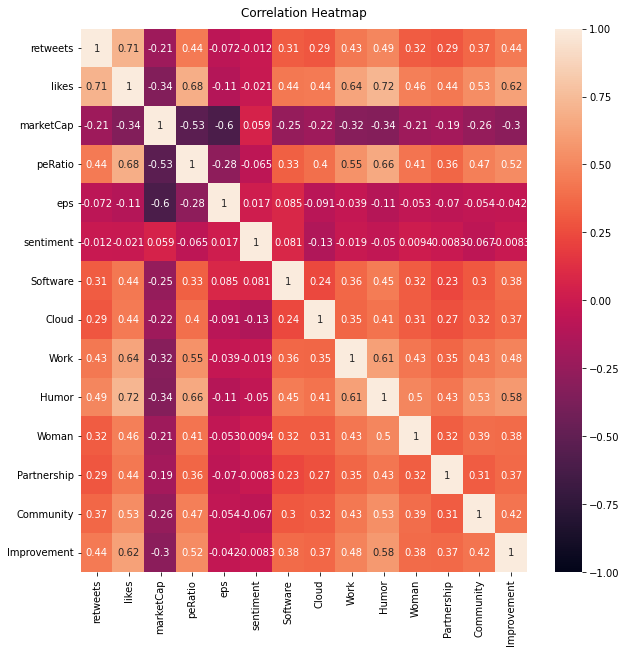

In [ ]:
numerical_df = final_df_agg[['retweets', 'likes', 'marketCap', 'peRatio', 'eps', 'sentiment', 'Software', 'Cloud', 'Work', 'Humor',
       'Woman', 'Partnership', 'Community', 'Improvement']]
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(numerical_df.corr(), vmin=-1, vmax=1, annot=True, ax = ax).set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)


Text(0.5, 1.0, 'Correlation Heatmap')

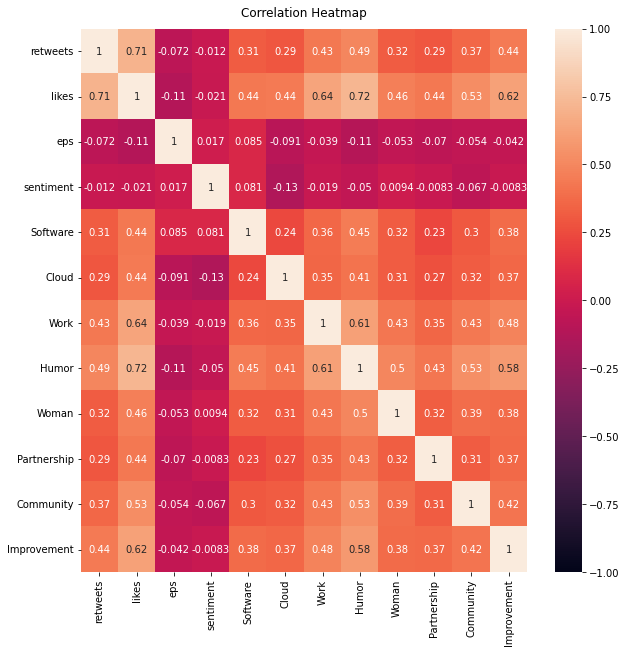

In [ ]:
# remove marketcap and peratio
numerical_df_2 = final_df_agg[['retweets', 'likes', 'eps', 'sentiment', 'Software', 'Cloud', 'Work', 'Humor',
       'Woman', 'Partnership', 'Community', 'Improvement']]
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(numerical_df_2.corr(), vmin=-1, vmax=1, annot=True, ax = ax).set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

## Point Biserial Correlation 

To look at the relationship between binary and continuous data

sentiment and symbol are not binary


**Low correlation between binary and continuous data**

In [ ]:
continuous_df = final_df_agg[['retweets', 'likes', 'marketCap', 'peRatio', 'eps', 'sentiment', 'Software', 'Cloud', 'Work', 'Humor',
       'Woman', 'Partnership', 'Community', 'Improvement']]
binary_df = final_df_agg[['prev_day_change']]
binary_df

,prev_day_change
2600,0
2602,1
2605,1
2607,1
2609,1
...,...
2747,0
2751,0
2754,0
2756,0


In [ ]:
biserialcorr_df = pd.DataFrame(columns=continuous_df.columns, index=binary_df.columns)


for i in binary_df.columns:
  lst = []
  for z in continuous_df.columns:
    lst.append(pointbiserialr(binary_df[i], continuous_df[z])[0])
  biserialcorr_df.loc[i] = lst

biserialcorr_df

,retweets,likes,marketCap,peRatio,eps,sentiment,Software,Cloud,Work,Humor,Woman,Partnership,Community,Improvement
prev_day_change,0.021178,0.013238,0.040858,-0.004708,-0.028162,-0.021735,0.010014,-0.008406,-0.007682,0.008645,0.017166,-0.016813,-0.015371,0.005171


## Cramer V Corr

To look at the relationship between categorical data

0 to 1 (1 = perfect association)

**No significant association between categorical data**

In [ ]:
#categorical_df = df_agg[['Software', 'Cloud', 'Work', 'Humor', 'Woman','Partnership', 'Community', 'Improvement', 'symbol']]
#categorical_df

In [ ]:
# label encoding

#label = preprocessing.LabelEncoder()
#data_encoded = pd.DataFrame() 

#for i in categorical_df.columns :
  #data_encoded[i]=label.fit_transform(categorical_df[i])

#data_encoded

In [ ]:
# cramer v function

#def cramers_V(var1,var2) :
  #crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  #stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  #obs = np.sum(crosstab) # Number of observations
  #mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  #return (stat/(obs*mini))

In [ ]:
#rows= []

#for var1 in data_encoded:
  #col = []
  #for var2 in data_encoded :
    #cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    #col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  #rows.append(col)
  
#cramers_results = np.array(rows)
#cramer_df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

#cramer_df

In [ ]:
#fig, ax = plt.subplots(figsize=(10,10)) 
#sns.heatmap(cramer_df, vmin=-1, vmax=1, annot=True, ax = ax).set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

## Boxplot to check for outliers

In [ ]:
final_df_agg.columns

Index(['date', 'symbol', 'marketCap', 'eps', 'vol_diff_lead', 'change_lead',
       'peRatio', 'retweets', 'likes', 'Software', 'Cloud', 'Work', 'Humor',
       'Woman', 'Partnership', 'Community', 'Improvement', 'sentiment',
       'prev_day_change'],
      dtype='object')

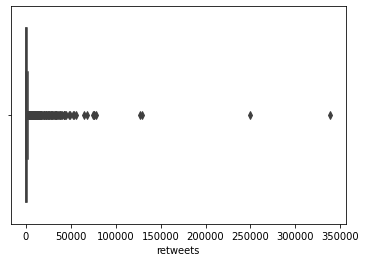

In [ ]:
sns.boxplot(x=final_df_agg["retweets"])

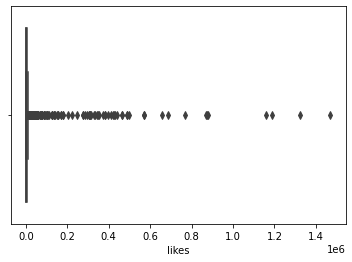

In [ ]:
sns.boxplot(x=final_df_agg["likes"])

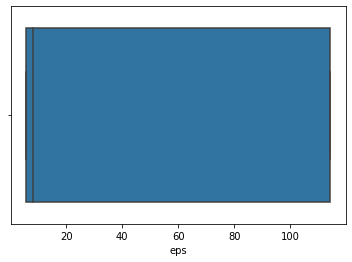

In [ ]:
sns.boxplot(x=final_df_agg["eps"])

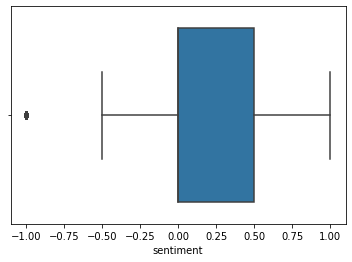

In [ ]:
sns.boxplot(x=final_df_agg["sentiment"])

In [ ]:
# filter out outliers 

numeric_cols = ['retweets', 'likes', 'eps', 'sentiment', 'Software', 'Cloud', 'Work', 'Humor',
       'Woman', 'Partnership', 'Community', 'Improvement']
df_no_outliers = final_df_agg.copy()
for i in numeric_cols:
  df_no_outliers = df_no_outliers[(np.abs(stats.zscore(df_no_outliers[i])) < 3)]
df_no_outliers


,date,symbol,marketCap,eps,vol_diff_lead,change_lead,peRatio,retweets,likes,Software,Cloud,Work,Humor,Woman,Partnership,Community,Improvement,sentiment,prev_day_change
2632,2021-11-11,TSLA,812495976960,5.750000,1,0,147.217970,8986,17576,0,0,1,1,1,0,0,0,0.0,0
2703,2022-01-03,TSLA,812495976960,5.750000,0,0,147.217970,1476,26375,0,0,0,1,0,0,0,1,0.0,1
2708,2022-01-05,TSLA,812495976960,5.750000,1,0,147.217970,851,19390,0,0,0,1,0,0,0,1,0.0,0
614,2015-09-11,AMZN,1439780000000,65.960000,0,0,43.153699,0,5,0,1,0,0,0,0,0,1,0.5,0
632,2015-09-30,AMZN,1439780000000,65.960000,0,1,43.153699,39,45,1,0,0,0,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2747,2022-02-01,GOOG,1774771018820,114.205162,1,0,23.342115,318,4200,1,0,0,0,0,0,0,0,1.0,0
2751,2022-02-02,GOOG,1774771018820,114.205162,0,0,23.342115,104,1441,0,0,1,0,0,0,0,0,0.0,0
2754,2022-02-03,GOOG,1774771018820,114.205162,0,0,23.342115,495,14242,0,0,0,1,0,0,0,0,1.0,0
2756,2022-02-04,GOOG,1774771018820,114.205162,0,0,23.342115,232,2092,0,0,0,0,0,1,0,0,0.0,0


# Standardise 

In [ ]:
# checking if sentiment should be parsed through a label encoder or minmax scaler
final_df_agg['sentiment'].unique()

array([ 0.2       ,  0.16666667,  0.06666667,  0.22727273,  0.14285714,
        0.        ,  0.33333333,  0.36363636,  0.125     ,  0.21052632,
        0.08333333,  0.23809524,  0.5       ,  0.09090909,  0.55555556,
        1.        ,  0.30769231,  0.23076923,  0.28571429,  0.3125    ,
        0.375     ,  0.29411765,  0.4       ,  0.07692308,  0.1       ,
        0.42857143,  0.25      , -0.33333333,  0.15789474, -0.2       ,
        0.07142857, -1.        ,  0.66666667, -0.5       ,  0.75      ,
        0.6       ,  0.57142857,  0.44444444,  0.38461538])

In [ ]:
final_df_agg = final_df_agg.reset_index(drop=True)
final_df_agg

,date,symbol,marketCap,eps,vol_diff_lead,change_lead,peRatio,retweets,likes,Software,Cloud,Work,Humor,Woman,Partnership,Community,Improvement,sentiment,prev_day_change
0,2021-10-27,TSLA,812495976960,5.750000,0,1,147.217970,14008,87566,0,2,0,0,0,1,0,2,0.200000,0
1,2021-10-28,TSLA,812495976960,5.750000,1,1,147.217970,32204,204336,2,3,4,4,3,2,4,3,0.166667,1
2,2021-10-29,TSLA,812495976960,5.750000,1,1,147.217970,76060,1158958,3,4,4,7,4,5,4,5,0.066667,1
3,2021-11-01,TSLA,812495976960,5.750000,0,1,147.217970,44169,422058,6,7,5,10,5,7,4,6,0.227273,1
4,2021-11-02,TSLA,812495976960,5.750000,0,1,147.217970,33735,303856,3,2,3,2,2,3,3,2,0.166667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2752,2022-02-01,GOOG,1774771018820,114.205162,1,0,23.342115,318,4200,1,0,0,0,0,0,0,0,1.000000,0
2753,2022-02-02,GOOG,1774771018820,114.205162,0,0,23.342115,104,1441,0,0,1,0,0,0,0,0,0.000000,0
2754,2022-02-03,GOOG,1774771018820,114.205162,0,0,23.342115,495,14242,0,0,0,1,0,0,0,0,1.000000,0
2755,2022-02-04,GOOG,1774771018820,114.205162,0,0,23.342115,232,2092,0,0,0,0,0,1,0,0,0.000000,0


In [ ]:
numeric_columns = ['retweets', 'likes', 'marketCap', 'eps', 'peRatio', 'sentiment','Software','Cloud','Humor','Woman','Partnership','Community','Improvement','Work']
binary_columns = ['prev_day_change']

X_numeric = final_df_agg[numeric_columns]
X_binary = final_df_agg[binary_columns]

# parse numeric columns through minmaxscaler
min_max_scaler = preprocessing.MinMaxScaler()
x_numeric_val = X_numeric.values
x_sc = min_max_scaler.fit_transform(x_numeric_val)
X_scaled = pd.DataFrame(x_sc)
X_scaled.columns = X_numeric.columns

# hstack X_scaled and X_binary: This is our final X variables
X = pd.concat([X_binary,X_scaled],axis=1)

# X and Y combined: To decide on vol_diff_lead and change_lead as our Y variables
new_df = pd.concat([X,final_df_agg[['date','symbol','vol_diff_lead', 'change_lead']]],axis=1)
new_df

,prev_day_change,retweets,likes,marketCap,eps,peRatio,sentiment,Software,Cloud,Humor,Woman,Partnership,Community,Improvement,Work,date,symbol,vol_diff_lead,change_lead
0,0,0.041332,0.059569,0.000000,0.000737,1.0,0.600000,0.000000,0.285714,0.0,0.000000,0.142857,0.000000,0.250,0.000000,2021-10-27,TSLA,0,1
1,1,0.095021,0.139006,0.000000,0.000737,1.0,0.583333,0.333333,0.428571,0.4,0.333333,0.285714,0.666667,0.375,0.571429,2021-10-28,TSLA,1,1
2,1,0.224423,0.788415,0.000000,0.000737,1.0,0.533333,0.500000,0.571429,0.7,0.444444,0.714286,0.666667,0.625,0.571429,2021-10-29,TSLA,1,1
3,1,0.130325,0.287117,0.000000,0.000737,1.0,0.613636,1.000000,1.000000,1.0,0.555556,1.000000,0.666667,0.750,0.714286,2021-11-01,TSLA,0,1
4,1,0.099539,0.206707,0.000000,0.000737,1.0,0.583333,0.500000,0.285714,0.2,0.222222,0.428571,0.500000,0.250,0.428571,2021-11-02,TSLA,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2752,0,0.000938,0.002857,0.576219,1.000000,0.0,1.000000,0.166667,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,2022-02-01,GOOG,1,0
2753,0,0.000307,0.000980,0.576219,1.000000,0.0,0.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.142857,2022-02-02,GOOG,0,0
2754,0,0.001461,0.009689,0.576219,1.000000,0.0,1.000000,0.000000,0.000000,0.1,0.000000,0.000000,0.000000,0.000,0.000000,2022-02-03,GOOG,0,0
2755,0,0.000685,0.001423,0.576219,1.000000,0.0,0.500000,0.000000,0.000000,0.0,0.000000,0.142857,0.000000,0.000,0.000000,2022-02-04,GOOG,0,0


In [ ]:
final_df_agg = new_df.copy()

# Final dataset

In [ ]:
final_df_agg = final_df_agg.reset_index(drop=True)

In [ ]:
final_df_agg

,prev_day_change,retweets,likes,marketCap,eps,peRatio,sentiment,Software,Cloud,Humor,Woman,Partnership,Community,Improvement,Work,date,symbol,vol_diff_lead,change_lead
0,0,0.041332,0.059569,0.000000,0.000737,1.0,0.600000,0.000000,0.285714,0.0,0.000000,0.142857,0.000000,0.250,0.000000,2021-10-27,TSLA,0,1
1,1,0.095021,0.139006,0.000000,0.000737,1.0,0.583333,0.333333,0.428571,0.4,0.333333,0.285714,0.666667,0.375,0.571429,2021-10-28,TSLA,1,1
2,1,0.224423,0.788415,0.000000,0.000737,1.0,0.533333,0.500000,0.571429,0.7,0.444444,0.714286,0.666667,0.625,0.571429,2021-10-29,TSLA,1,1
3,1,0.130325,0.287117,0.000000,0.000737,1.0,0.613636,1.000000,1.000000,1.0,0.555556,1.000000,0.666667,0.750,0.714286,2021-11-01,TSLA,0,1
4,1,0.099539,0.206707,0.000000,0.000737,1.0,0.583333,0.500000,0.285714,0.2,0.222222,0.428571,0.500000,0.250,0.428571,2021-11-02,TSLA,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2752,0,0.000938,0.002857,0.576219,1.000000,0.0,1.000000,0.166667,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,2022-02-01,GOOG,1,0
2753,0,0.000307,0.000980,0.576219,1.000000,0.0,0.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.142857,2022-02-02,GOOG,0,0
2754,0,0.001461,0.009689,0.576219,1.000000,0.0,1.000000,0.000000,0.000000,0.1,0.000000,0.000000,0.000000,0.000,0.000000,2022-02-03,GOOG,0,0
2755,0,0.000685,0.001423,0.576219,1.000000,0.0,0.500000,0.000000,0.000000,0.0,0.000000,0.142857,0.000000,0.000,0.000000,2022-02-04,GOOG,0,0


In [ ]:
final_df_agg = final_df_agg.sort_values(by=['date'])

In [ ]:
# excluding financial data marketCap and peRatio due to high collinearity with eps. eps is a more important feature as compared to the other two. prevent overfitting as well.
# remove vol_diff_lead as change_lead will be our target variable
final_df_agg = final_df_agg[['retweets', 'likes', 'Software', 'Cloud', 'Work', 'Humor',
       'Woman', 'Partnership', 'Community', 'Improvement', 'eps', 'sentiment','prev_day_change','change_lead']]

In [ ]:
# Data looks balanaced
print(final_df_agg['change_lead'].value_counts())

# Base score if we just predict popular class: 51.4% Accuracy
final_df_agg['change_lead'].value_counts()[1]/len(final_df_agg)

1    1417
0    1340
Name: change_lead, dtype: int64


0.5139644541167936

# Split into train and test set, output to csv

In [ ]:
final_df_agg

,retweets,likes,Software,Cloud,Work,Humor,Woman,Partnership,Community,Improvement,eps,sentiment,prev_day_change,change_lead
1863,0.000000,0.000003,0.000000,0.000000,0.142857,0.0,0.000000,0.000000,0.000000,0.000,1.000000,0.500000,1,0
982,0.000027,0.000010,0.000000,0.000000,0.000000,0.0,0.111111,0.000000,0.000000,0.000,0.022573,0.500000,1,0
1864,0.000000,0.000001,0.166667,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,1.000000,1.000000,0,1
983,0.000018,0.000007,0.000000,0.000000,0.000000,0.0,0.000000,0.142857,0.000000,0.000,0.022573,1.000000,0,1
984,0.000015,0.000007,0.000000,0.000000,0.000000,0.1,0.000000,0.000000,0.000000,0.000,0.022573,1.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,0.000685,0.001423,0.000000,0.000000,0.000000,0.0,0.000000,0.142857,0.000000,0.000,1.000000,0.500000,0,0
328,0.000307,0.000464,0.000000,0.000000,0.000000,0.0,0.000000,0.142857,0.000000,0.000,0.555488,1.000000,1,1
68,0.124026,0.261144,0.166667,0.142857,0.714286,0.3,0.111111,0.285714,0.333333,0.375,0.000737,0.545455,0,1
2756,0.000263,0.000683,0.000000,0.142857,0.000000,0.0,0.000000,0.000000,0.000000,0.000,1.000000,0.500000,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df_agg.drop(columns=['change_lead']), final_df_agg['change_lead'],test_size=0.1, shuffle=False)

In [ ]:
trainingset = pd.concat([X_train, y_train], axis=1)
trainingset = trainingset.reset_index(drop=True)

testingset = pd.concat([X_test, y_test], axis=1)
testingset = testingset.reset_index(drop=True)

In [ ]:
# save trainingset
trainingset.to_csv("/content/drive/MyDrive/Data Modelling/Stock Prices Prediction/train.csv", index = False)

# save testingset
testingset.to_csv("/content/drive/MyDrive/Data Modelling/Stock Prices Prediction/test.csv", index = False)

In [ ]:
X_train
final_df_agg['change_lead'].value_counts()

1    1417
0    1340
Name: change_lead, dtype: int64

# Standardise for dataset without outliers

In [ ]:
df_no_outliers = df_no_outliers.reset_index(drop=True)
df_no_outliers

,date,symbol,marketCap,eps,vol_diff_lead,change_lead,peRatio,retweets,likes,Software,Cloud,Work,Humor,Woman,Partnership,Community,Improvement,sentiment,prev_day_change
0,2021-11-11,TSLA,812495976960,5.750000,1,0,147.217970,8986,17576,0,0,1,1,1,0,0,0,0.0,0
1,2022-01-03,TSLA,812495976960,5.750000,0,0,147.217970,1476,26375,0,0,0,1,0,0,0,1,0.0,1
2,2022-01-05,TSLA,812495976960,5.750000,1,0,147.217970,851,19390,0,0,0,1,0,0,0,1,0.0,0
3,2015-09-11,AMZN,1439780000000,65.960000,0,0,43.153699,0,5,0,1,0,0,0,0,0,1,0.5,0
4,2015-09-30,AMZN,1439780000000,65.960000,0,1,43.153699,39,45,1,0,0,0,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441,2022-02-01,GOOG,1774771018820,114.205162,1,0,23.342115,318,4200,1,0,0,0,0,0,0,0,1.0,0
2442,2022-02-02,GOOG,1774771018820,114.205162,0,0,23.342115,104,1441,0,0,1,0,0,0,0,0,0.0,0
2443,2022-02-03,GOOG,1774771018820,114.205162,0,0,23.342115,495,14242,0,0,0,1,0,0,0,0,1.0,0
2444,2022-02-04,GOOG,1774771018820,114.205162,0,0,23.342115,232,2092,0,0,0,0,0,1,0,0,0.0,0


In [ ]:
numeric_columns = ['retweets', 'likes', 'marketCap', 'eps', 'peRatio', 'sentiment','Software','Cloud','Humor','Woman','Partnership','Community','Improvement','Work']
binary_columns = ['prev_day_change']

X_numeric_no_outlier = df_no_outliers[numeric_columns]
X_binary_no_outlier = df_no_outliers[binary_columns]

# parse numeric columns through minmaxscaler
min_max_scaler = preprocessing.MinMaxScaler()
x_numeric_val_no_outlier = X_numeric_no_outlier.values
x_sc_no_outlier = min_max_scaler.fit_transform(x_numeric_val_no_outlier)
X_scaled_no_outlier = pd.DataFrame(x_sc_no_outlier)
X_scaled_no_outlier.columns = X_numeric_no_outlier.columns

# hstack X_scaled and X_binary: This is our final X variables
X_no_outlier = pd.concat([X_binary_no_outlier,X_scaled_no_outlier],axis=1)

# X and Y combined: To decide on vol_diff_lead and change_lead as our Y variables
new_df_no_outlier = pd.concat([X_no_outlier,df_no_outliers[['date','symbol','vol_diff_lead', 'change_lead']]],axis=1)
new_df_no_outlier

,prev_day_change,retweets,likes,marketCap,eps,peRatio,sentiment,Software,Cloud,Humor,Woman,Partnership,Community,Improvement,Work,date,symbol,vol_diff_lead,change_lead
0,0,0.339133,0.192652,0.000000,0.000737,1.000000,0.50,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2021-11-11,TSLA,1,0
1,1,0.055704,0.289098,0.000000,0.000737,1.000000,0.50,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2022-01-03,TSLA,0,0
2,0,0.032117,0.212535,0.000000,0.000737,1.000000,0.50,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2022-01-05,TSLA,1,0
3,0,0.000000,0.000055,0.375623,0.555488,0.159931,0.75,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2015-09-11,AMZN,0,0
4,0,0.001472,0.000493,0.375623,0.555488,0.159931,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-30,AMZN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441,0,0.012001,0.046036,0.576219,1.000000,0.000000,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-02-01,GOOG,1,0
2442,0,0.003925,0.015795,0.576219,1.000000,0.000000,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2022-02-02,GOOG,0,0
2443,0,0.018681,0.156108,0.576219,1.000000,0.000000,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-02-03,GOOG,0,0
2444,0,0.008756,0.022931,0.576219,1.000000,0.000000,0.50,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2022-02-04,GOOG,0,0


# Final dataset without outliers

In [ ]:
new_df_no_outlier = new_df_no_outlier.reset_index(drop=True)

In [ ]:
new_df_no_outlier

,prev_day_change,retweets,likes,marketCap,eps,peRatio,sentiment,Software,Cloud,Humor,Woman,Partnership,Community,Improvement,Work,date,symbol,vol_diff_lead,change_lead
0,0,0.339133,0.192652,0.000000,0.000737,1.000000,0.50,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2021-11-11,TSLA,1,0
1,1,0.055704,0.289098,0.000000,0.000737,1.000000,0.50,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2022-01-03,TSLA,0,0
2,0,0.032117,0.212535,0.000000,0.000737,1.000000,0.50,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2022-01-05,TSLA,1,0
3,0,0.000000,0.000055,0.375623,0.555488,0.159931,0.75,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2015-09-11,AMZN,0,0
4,0,0.001472,0.000493,0.375623,0.555488,0.159931,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-30,AMZN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441,0,0.012001,0.046036,0.576219,1.000000,0.000000,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-02-01,GOOG,1,0
2442,0,0.003925,0.015795,0.576219,1.000000,0.000000,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2022-02-02,GOOG,0,0
2443,0,0.018681,0.156108,0.576219,1.000000,0.000000,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-02-03,GOOG,0,0
2444,0,0.008756,0.022931,0.576219,1.000000,0.000000,0.50,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2022-02-04,GOOG,0,0


In [ ]:
new_df_no_outlier = new_df_no_outlier.sort_values(by=['date'])

In [ ]:
# excluding financial data marketCap and peRatio due to high collinearity with eps. eps is a more important feature as compared to the other two. prevent overfitting as well.
# remove vol_diff_lead as change_lead will be our target variable
new_df_no_outlier = new_df_no_outlier[['retweets', 'likes', 'Software', 'Cloud', 'Work', 'Humor',
       'Woman', 'Partnership', 'Community', 'Improvement', 'eps', 'sentiment','prev_day_change','change_lead']]

In [ ]:
# Data looks balanaced
print(new_df_no_outlier['change_lead'].value_counts())

# Base score if we just predict popular class: 51.4% Accuracy
new_df_no_outlier['change_lead'].value_counts()[1]/len(new_df_no_outlier)

1    1244
0    1202
Name: change_lead, dtype: int64


0.508585445625511

# Split into train and test set, output to csv without outliers

In [ ]:
new_df_no_outlier

,retweets,likes,Software,Cloud,Work,Humor,Woman,Partnership,Community,Improvement,eps,sentiment,prev_day_change,change_lead
1658,0.000000,0.000044,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.5,1,0
852,0.000340,0.000153,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.022573,0.5,1,0
1659,0.000000,0.000022,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,0,1
853,0.000226,0.000110,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.022573,1.0,0,1
854,0.000189,0.000121,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.022573,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,0.018681,0.156108,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,1.0,0,0
252,0.003963,0.007760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.555488,0.5,0,1
2444,0.008756,0.022931,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.5,0,0
253,0.003925,0.007475,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.555488,1.0,1,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df_no_outlier.drop(columns=['change_lead']), new_df_no_outlier['change_lead'],test_size=0.1, shuffle=False)

In [ ]:
trainingset = pd.concat([X_train, y_train], axis=1)
trainingset = trainingset.reset_index(drop=True)

testingset = pd.concat([X_test, y_test], axis=1)
testingset = testingset.reset_index(drop=True)

In [ ]:
# save trainingset
# trainingset.to_csv("/content/drive/MyDrive/Data Modelling/Stock Prices Prediction/train_wout_outliers.csv", index = False)

# save testingset
# testingset.to_csv("/content/drive/MyDrive/Data Modelling/Stock Prices Prediction/test_wout_outliers.csv", index = False)

In [ ]:
X_train
new_df_no_outlier['change_lead'].value_counts()

1    1244
0    1202
Name: change_lead, dtype: int64